<ipython-input-1-b43a0a40e0fa>:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)
<ipython-input-1-b43a0a40e0fa>:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)


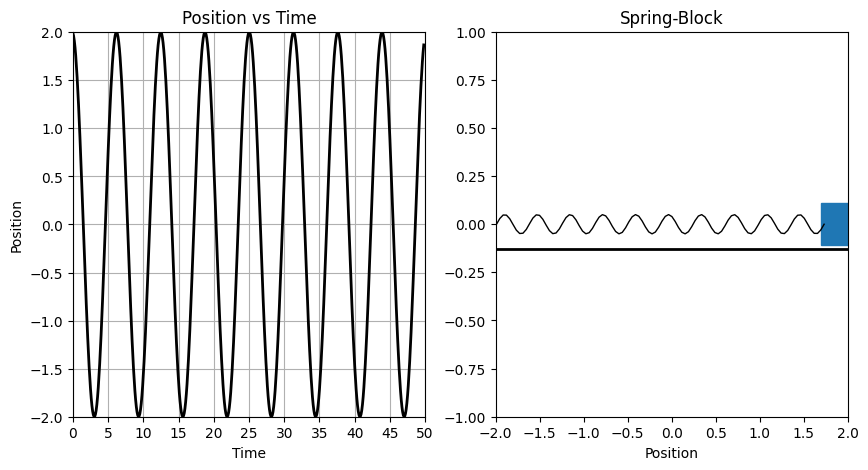

In [ ]:
# SPRING MASS UNDAMPED UNFORCED OSCILLATION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

# variables
m = 1.0 # mass
k = 1.0 # spring coefficient
c = 0.0  # damping coefficient
F0 = 0.0 # amplitude of force
omega = 1.0 # frequency

# time parameters
start_time = 0.0
end_time = 50.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
y = np.array([0,2.0])  # velocity, displacement

# matrices
A = np.array([[m,0],[0,1]])
A_inv = inv(A)
B = np.array([[c,k],[-1,0]])
positions = []
force = []
velocities = []

# Force Function
def F(t):
  F = np.array([0.0,0.0])
  F[0] = F0*np.cos(omega*t)
  return F

# G Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# Runge Kutta Function
def RK4(y, t, dt):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0
  #return dt*k1

# time-stepping Solution
for t in time:
  y = y + RK4(y, t, delta_t)
  positions.append(y[1])
  velocities.append(y[0])
  force.append(F(t)[0])
#  KE = 0.5*m*y[0]**2
#  PE = 0.5*k*y[1]**2

# CREATING THE ANIMATION
# Generate a figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

# Dividing the figure into 1x2
gs = gridspec.GridSpec(1, 2)

# Function to draw spring
def draw_spring(ax, x, y, length, coils, amplitude):
    # x: x position of the spring
    # y: y position of the spring
    # length: total length of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(0, length, 100) + x
    spring_y = amplitude *np.arcsin(np.sin(t)) + y
    spring_line, = ax.plot(spring_x, spring_y, 'k', lw=1)
    return spring_line

# Updating Function
def update_plot(frame):
    curve.set_data(time[:frame], positions[:frame])
    box.set_data(positions[frame], 0)
    spring_line.set_data(np.linspace(-1*positions[0], positions[frame]-0.2, 100),
                         0.05 * np.sin(np.linspace(0, 2 * np.pi * 10, 100)))
    return curve, box, spring_line

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
curve, = ax0.plot([], [], 'k', lw=2)
plt.xlim(time[0], time[-1])
plt.ylim(-1*round(positions[0],0), round(positions[0],0)+0.005)
plt.xticks(np.arange(time[0], time[-1] + delta_t, 5.0), size=10)
plt.yticks(np.arange(-1.0*round(positions[0],0), round(positions[0],0) + 0.005, 0.5), size=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Position', fontsize=10)
plt.title('Position vs Time', fontsize=12)
plt.grid(True)

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
box, = ax1.plot([], [], 's', ms=30)
ground, = ax1.plot([-positions[0], positions[0]], [-0.13, -0.13], 'k', lw=2)

# Draw the spring
spring_line = draw_spring(ax1, -1.0*positions[0], 0, positions[0], 10, 0.05)

plt.ylim(-1.0, 1.0)
plt.xlim(-positions[0], positions[0])
plt.xticks(np.arange(-1.0*round(positions[0],0), round(positions[0],0) + 0.005, round(positions[0],0)/4.0), size=10)
plt.xlabel('Position', fontsize=10)
plt.title('Spring-Block', fontsize=12)

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

<ipython-input-11-02663ec5e87f>:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)
<ipython-input-11-02663ec5e87f>:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)


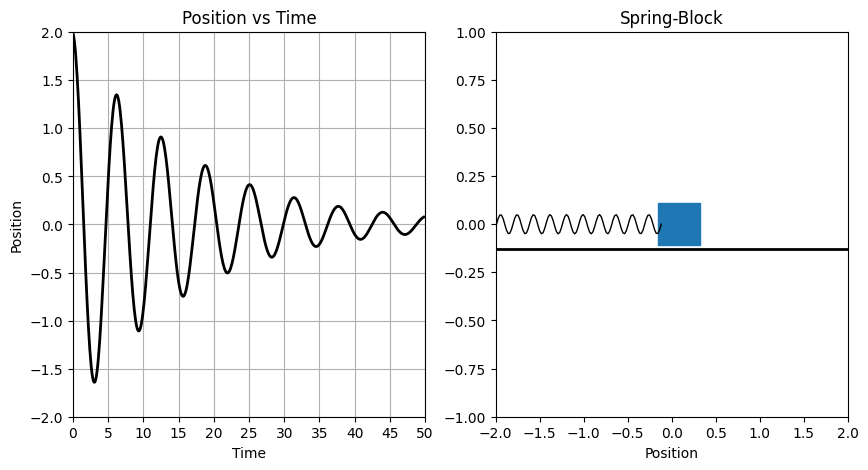

In [ ]:
# SPRING MASS DAMPED UNFORCED OSCILLATION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

# variables
m = 1.0 # mass
k = 1.0 # spring coefficient
c = 0.125  # damping coefficient
F0 = 0.0 # amplitude of force
omega = 1.0 # frequency

# time parameters
start_time = 0.0
end_time = 50.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
y = np.array([0,2.0])  # velocity, displacement

# matrices
A = np.array([[m,0],[0,1]])
A_inv = inv(A)
B = np.array([[c,k],[-1,0]])
positions = []
force = []
velocities = []

# Force Function
def F(t):
  F = np.array([0.0,0.0])
  F[0] = F0*np.cos(omega*t)
  return F

# G Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# Runge Kutta Function
def RK4(y, t, dt):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0
  #return dt*k1

# time-stepping Solution
for t in time:
  y = y + RK4(y, t, delta_t)
  positions.append(y[1])
  velocities.append(y[0])
  force.append(F(t)[0])
#  KE = 0.5*m*y[0]**2
#  PE = 0.5*k*y[1]**2

# CREATING THE ANIMATION
# Generate a figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

# Dividing the figure into 1x2
gs = gridspec.GridSpec(1, 2)

# Function to draw spring
def draw_spring(ax, x, y, length, coils, amplitude):
    # x: x position of the spring
    # y: y position of the spring
    # length: total length of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(0, length, 100) + x
    spring_y = amplitude * np.sin(t) + y
    spring_line, = ax.plot(spring_x, spring_y, 'k', lw=1)
    return spring_line

# Updating Function
def update_plot(frame):
    curve.set_data(time[:frame], positions[:frame])
    box.set_data(positions[frame], 0)
    spring_line.set_data(np.linspace(-1*positions[0], positions[frame]-0.2, 100),
                         0.05 * np.sin(np.linspace(0, 2 * np.pi * 10, 100)))
    return curve, box, spring_line

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
curve, = ax0.plot([], [], 'k', lw=2)
plt.xlim(time[0], time[-1])
plt.ylim(-1*round(positions[0],0), round(positions[0],0)+0.005)
plt.xticks(np.arange(time[0], time[-1] + delta_t, 5.0), size=10)
plt.yticks(np.arange(-1.0*round(positions[0],0), round(positions[0],0) + 0.005, 0.5), size=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Position', fontsize=10)
plt.title('Position vs Time', fontsize=12)
plt.grid(True)

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
box, = ax1.plot([], [], 's', ms=30)
ground, = ax1.plot([-positions[0], positions[0]], [-0.13, -0.13], 'k', lw=2)

# Draw the spring
spring_line = draw_spring(ax1, -1.0*positions[0], 0, positions[0], 10, 0.05)

plt.ylim(-1.0, 1.0)
plt.xlim(-positions[0], positions[0])
plt.xticks(np.arange(-1.0*round(positions[0],0), round(positions[0],0) + 0.005, round(positions[0],0)/4.0), size=10)
plt.xlabel('Position', fontsize=10)
plt.title('Spring-Block', fontsize=12)

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

<ipython-input-2-49577e7c1296>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)
<ipython-input-2-49577e7c1296>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)


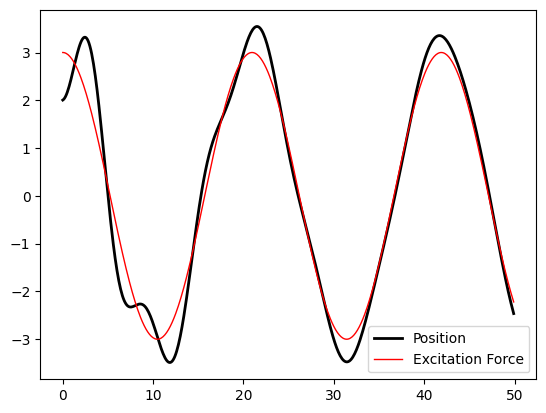

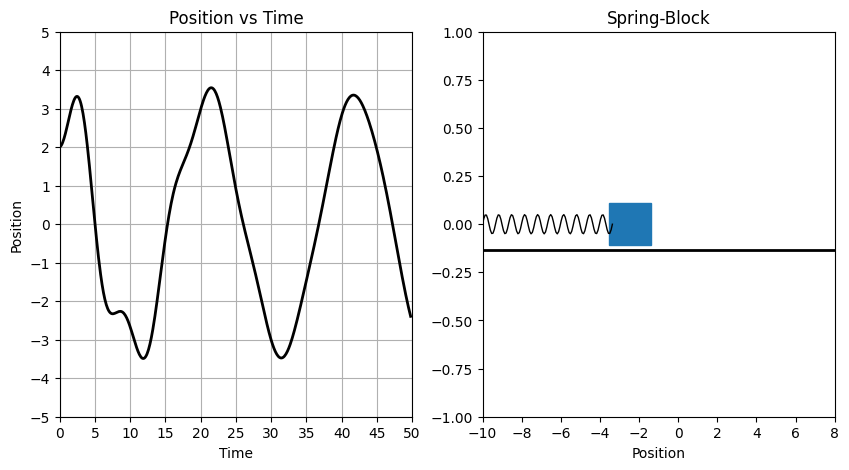

In [ ]:
# SPRING MASS DAMPED FORCED OSCILLATION
# LOW FREQUENCY EXCITATION FORCE RELATIVE TO NATURAL FREQUENCY
# STEADY STATE RESPONSE IN PHASE WITH THE EXCITATION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

# variables
m = 1.0 # mass
k = 1.0 # spring coefficient
c = 0.125  # damping coefficient
F0 = 3.0 # amplitude of force
omega = 0.3 # frequency

# time parameters
start_time = 0.0
end_time = 50.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
y = np.array([0,2.0])  # velocity, displacement

# matrices
A = np.array([[m,0],[0,1]])
A_inv = inv(A)
B = np.array([[c,k],[-1,0]])
positions = []
force = []
velocities = []

# Force Function
def F(t):
  F = np.array([0.0,0.0])
  F[0] = F0*np.cos(omega*t)
  return F

# G Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# Runge Kutta Function
def RK4(y, t, dt):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0
  #return dt*k1

# time-stepping Solution
for t in time:
  y = y + RK4(y, t, delta_t)
  positions.append(y[1])
  velocities.append(y[0])
  force.append(F(t)[0])
#  KE = 0.5*m*y[0]**2
#  PE = 0.5*k*y[1]**2

# plotting the results
plt.plot(time, positions, 'k', lw=2, label = 'Position')
plt.plot(time, force, 'r', lw=1, label = 'Excitation Force')
plt.legend()

# CREATING THE ANIMATION
# Generate a figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

# Dividing the figure into 1x2
gs = gridspec.GridSpec(1, 2)

# Function to draw spring
def draw_spring(ax, x, y, length, coils, amplitude):
    # x: x position of the spring
    # y: y position of the spring
    # length: total length of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(0, length, 100) + x
    spring_y = amplitude * np.sin(t) + y
    spring_line, = ax.plot(spring_x, spring_y, 'k', lw=1)
    return spring_line

# Updating Function
def update_plot(frame):
    curve.set_data(time[:frame], positions[:frame])
    box.set_data(positions[frame], 0)
    spring_line.set_data(np.linspace(-10, positions[frame]-0.9, 100),
                         0.05 * np.sin(np.linspace(0, 2 * np.pi * 10, 100)))
    return curve, box, spring_line

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
curve, = ax0.plot([], [], 'k', lw=2)
plt.xlim(time[0], time[-1])
plt.ylim(-1*round(positions[0],0)-1.5, round(positions[0],0)+1.5+0.005)
plt.xticks(np.arange(time[0], time[-1] + delta_t, 5.0), size=10)
plt.yticks(np.arange(-5, 5.1, 1), size=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Position', fontsize=10)
plt.title('Position vs Time', fontsize=12)
plt.grid(True)

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
box, = ax1.plot([], [], 's', ms=30)
ground, = ax1.plot([-15, 15], [-0.135, -0.135], 'k', lw=2)

#Draw the spring
spring_line = draw_spring(ax1, -10, 0, 12, 10, 0.05)

plt.ylim(-1.0, 1.0)
plt.xlim(-positions[0]-1.5, positions[0]+1.5)
plt.xticks(np.arange(-10, 10, 2), size=10)
plt.xlabel('Position', fontsize=10)
plt.title('Spring-Block', fontsize=12)

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

<ipython-input-22-0e8a69e45351>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)
<ipython-input-22-0e8a69e45351>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)


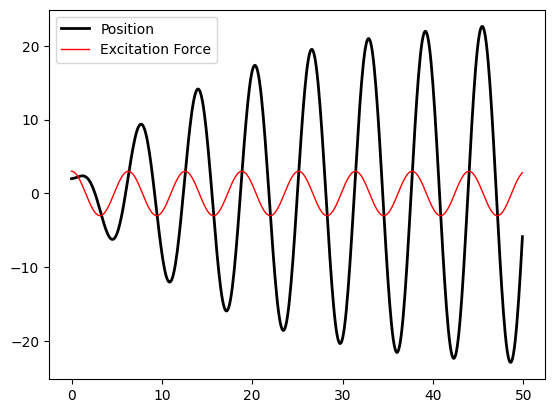

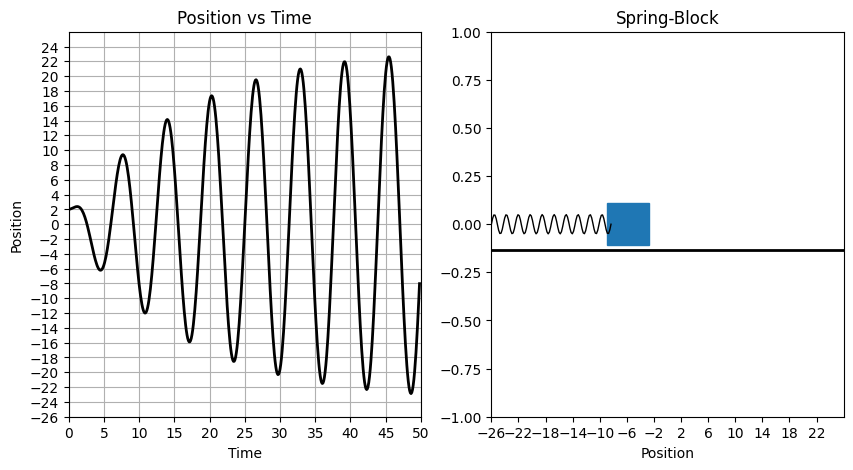

In [ ]:
# SPRING MASS DAMPED FORCED OSCILLATION
# NATURAL FREQUENCY EQUAL TO FREQUENCY OF EXCITATION FORCE
# STEADY STATE RESPONSE LAGS BY PI/2 FROM THE EXCITATION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

# variables
m = 1.0 # mass
k = 1.0 # spring coefficient
c = 0.125  # damping coefficient
F0 = 3.0 # amplitude of force
omega = 1.0 # frequency

# time parameters
start_time = 0.0
end_time = 50.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
y = np.array([0,2.0])  # velocity, displacement

# matrices
A = np.array([[m,0],[0,1]])
A_inv = inv(A)
B = np.array([[c,k],[-1,0]])
positions = []
force = []
velocities = []

# Force Function
def F(t):
  F = np.array([0.0,0.0])
  F[0] = F0*np.cos(omega*t)
  return F

# G Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# Runge Kutta Function
def RK4(y, t, dt):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0
  #return dt*k1

# time-stepping Solution
for t in time:
  y = y + RK4(y, t, delta_t)
  positions.append(y[1])
  velocities.append(y[0])
  force.append(F(t)[0])
#  KE = 0.5*m*y[0]**2
#  PE = 0.5*k*y[1]**2

# plotting the results
plt.plot(time, positions, 'k', lw=2, label = 'Position')
plt.plot(time, force, 'r', lw=1, label = 'Excitation Force')
plt.legend()

# CREATING THE ANIMATION
# Generate a figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

# Dividing the figure into 1x2
gs = gridspec.GridSpec(1, 2)

# Function to draw spring
def draw_spring(ax, x, y, length, coils, amplitude):
    # x: x position of the spring
    # y: y position of the spring
    # length: total length of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(0, length, 100) + x
    spring_y = amplitude * np.sin(t) + y
    spring_line, = ax.plot(spring_x, spring_y, 'k', lw=1)
    return spring_line

# Updating Function
def update_plot(frame):
    curve.set_data(time[:frame], positions[:frame])
    box.set_data(positions[frame], 0)
    spring_line.set_data(np.linspace(-26, positions[frame]-2.5, 100),
                         0.05 * np.sin(np.linspace(0, 2 * np.pi * 10, 100)))
    return curve, box, spring_line

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
curve, = ax0.plot([], [], 'k', lw=2)
plt.xlim(time[0], time[-1])
plt.ylim(-26, 26)
plt.xticks(np.arange(time[0], time[-1] + delta_t, 5.0), size=10)
plt.yticks(np.arange(-26, 26, 2), size=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Position', fontsize=10)
plt.title('Position vs Time', fontsize=12)
plt.grid(True)

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
box, = ax1.plot([], [], 's', ms=30)
ground, = ax1.plot([-26, 26], [-0.135, -0.135], 'k', lw=2)

#Draw the spring
spring_line = draw_spring(ax1, -26, 0, 26, 20, 0.05)

plt.ylim(-1.0, 1.0)
plt.xlim(-26, 26)
plt.xticks(np.arange(-26, 26, 4), size=10)
plt.xlabel('Position', fontsize=10)
plt.title('Spring-Block', fontsize=12)

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

<ipython-input-24-cd57d37dcfe7>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)
<ipython-input-24-cd57d37dcfe7>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)


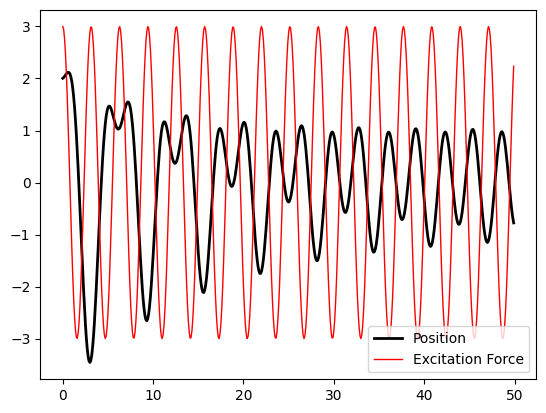

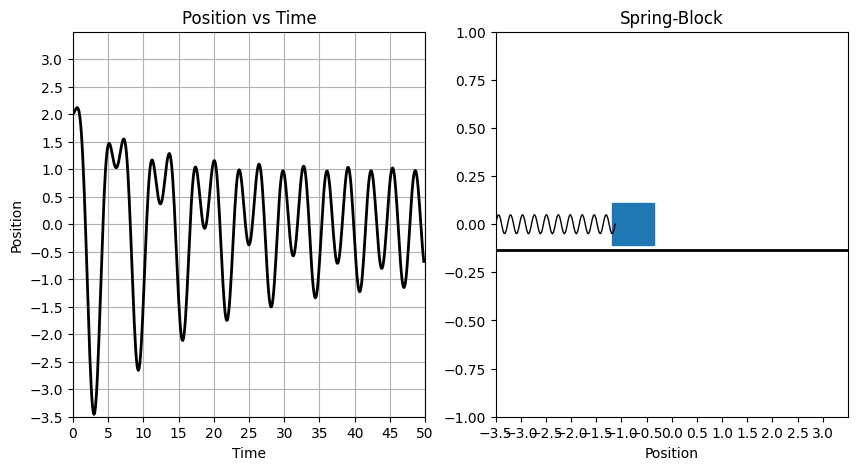

In [ ]:
# SPRING MASS DAMPED FORCED OSCILLATION
# HIGH FREQUENCY EXCITATION FORCE
# STEADY STATE RESPONSE LAGS BY PI FROM THE EXCITATION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

# variables
m = 1.0 # mass
k = 1.0 # spring coefficient
c = 0.125  # damping coefficient
F0 = 3.0 # amplitude of force
omega = 2.0 # frequency

# time parameters
start_time = 0.0
end_time = 50.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
y = np.array([0,2.0])  # velocity, displacement

# matrices
A = np.array([[m,0],[0,1]])
A_inv = inv(A)
B = np.array([[c,k],[-1,0]])
positions = []
force = []
velocities = []

# Force Function
def F(t):
  F = np.array([0.0,0.0])
  F[0] = F0*np.cos(omega*t)
  return F

# G Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# Runge Kutta Function
def RK4(y, t, dt):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0
  #return dt*k1

# time-stepping Solution
for t in time:
  y = y + RK4(y, t, delta_t)
  positions.append(y[1])
  velocities.append(y[0])
  force.append(F(t)[0])
#  KE = 0.5*m*y[0]**2
#  PE = 0.5*k*y[1]**2

# plotting the results
plt.plot(time, positions, 'k', lw=2, label = 'Position')
plt.plot(time, force, 'r', lw=1, label = 'Excitation Force')
plt.legend()

# CREATING THE ANIMATION
# Generate a figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

# Dividing the figure into 1x2
gs = gridspec.GridSpec(1, 2)

# Function to draw spring
def draw_spring(ax, x, y, length, coils, amplitude):
    # x: x position of the spring
    # y: y position of the spring
    # length: total length of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(0, length, 100) + x
    spring_y = amplitude * np.sin(t) + y
    spring_line, = ax.plot(spring_x, spring_y, 'k', lw=1)
    return spring_line

# Updating Function
def update_plot(frame):
    curve.set_data(time[:frame], positions[:frame])
    box.set_data(positions[frame], 0)
    spring_line.set_data(np.linspace(-3.5, positions[frame]-0.35, 100),
                         0.05 * np.sin(np.linspace(0, 2 * np.pi * 10, 100)))
    return curve, box, spring_line

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
curve, = ax0.plot([], [], 'k', lw=2)
plt.xlim(time[0], time[-1])
plt.ylim(-3.5, 3.5)
plt.xticks(np.arange(time[0], time[-1] + delta_t, 5.0), size=10)
plt.yticks(np.arange(-3.5, 3.5, 0.5), size=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Position', fontsize=10)
plt.title('Position vs Time', fontsize=12)
plt.grid(True)

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
box, = ax1.plot([], [], 's', ms=30)
ground, = ax1.plot([-10, 10], [-0.135, -0.135], 'k', lw=2)

#Draw the spring
spring_line = draw_spring(ax1, -3.5, 0, 3.5, 10, 0.05)

plt.ylim(-1.0, 1.0)
plt.xlim(-3.5, 3.5)
plt.xticks(np.arange(-3.5, 3.5, 0.5), size=10)
plt.xlabel('Position', fontsize=10)
plt.title('Spring-Block', fontsize=12)

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

<ipython-input-37-3eadffa5fb3a>:92: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)
<ipython-input-37-3eadffa5fb3a>:92: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box.set_data(positions[frame], 0)


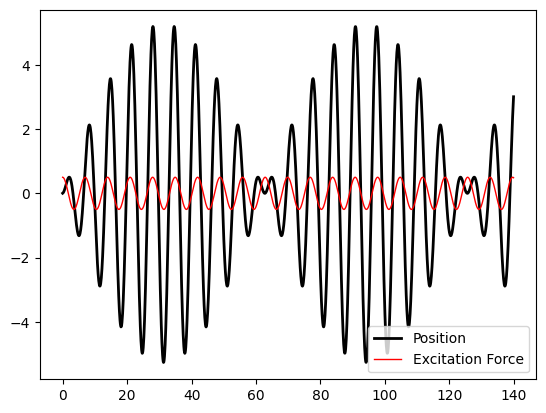

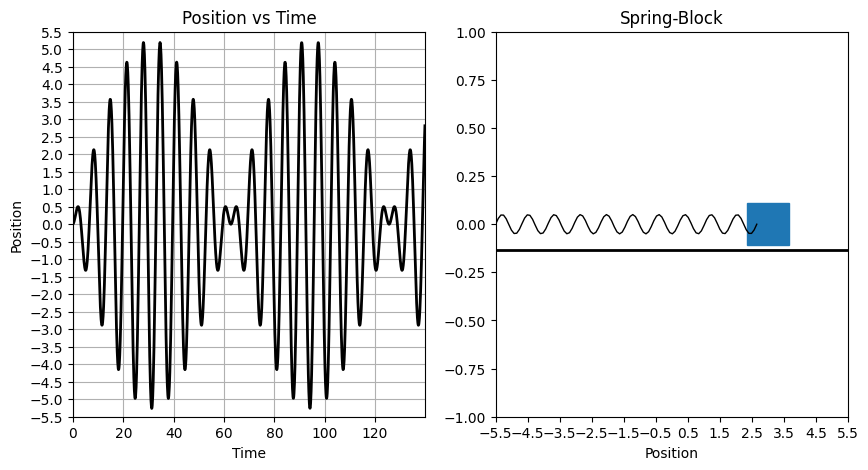

In [ ]:
# SPRING MASS UNDAMPED FORCED OSCILLATION
# BEATS

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
from numpy.linalg import inv
from IPython.display import HTML

# variables
m = 1.0 # mass
k = 1.0 # spring coefficient
c = 0.0  # damping coefficient
F0 = 0.5 # amplitude of force
omega = 0.9 # frequency

# time parameters
start_time = 0.0
end_time = 140.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
y = np.array([0.0,0.0])  # velocity, displacement

# matrices
A = np.array([[m,0],[0,1]])
A_inv = inv(A)
B = np.array([[c,k],[-1,0]])
positions = []
force = []
velocities = []

# Force Function
def F(t):
  F = np.array([0.0,0.0])
  F[0] = F0*np.cos(omega*t)
  return F

# G Function
def G(y, t):
  return A_inv.dot(F(t) - B.dot(y))

# Runge Kutta Function
def RK4(y, t, dt):
  k1 = G(y, t)
  k2 = G(y + k1*(dt/2.0), t + (dt/2.0))
  k3 = G(y + k2*(dt/2.0), t + (dt/2.0))
  k4 = G(y + k3*dt, t + dt)
  return dt*(k1 + 2*k2 + 2*k3 + k4)/6.0
  #return dt*k1

# time-stepping Solution
for t in time:
  y = y + RK4(y, t, delta_t)
  positions.append(y[1])
  velocities.append(y[0])
  force.append(F(t)[0])
#  KE = 0.5*m*y[0]**2
#  PE = 0.5*k*y[1]**2

# plotting the results
plt.plot(time, positions, 'k', lw=2, label = 'Position')
plt.plot(time, force, 'r', lw=1, label = 'Excitation Force')
plt.legend()

# CREATING THE ANIMATION
# Generate a figure
fig = plt.figure(figsize=(10, 5), facecolor='w')

# Dividing the figure into 1x2
gs = gridspec.GridSpec(1, 2)

# Function to draw spring
def draw_spring(ax, x, y, length, coils, amplitude):
    # x: x position of the spring
    # y: y position of the spring
    # length: total length of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(0, length, 100) + x
    spring_y = amplitude * np.sin(t) + y
    spring_line, = ax.plot(spring_x, spring_y, 'k', lw=1)
    return spring_line

# Updating Function
def update_plot(frame):
    curve.set_data(time[:frame], positions[:frame])
    box.set_data(positions[frame], 0)
    spring_line.set_data(np.linspace(-5.5, positions[frame]-0.35, 100),
                         0.05 * np.sin(np.linspace(0, 2 * np.pi * 10, 100)))
    return curve, box, spring_line

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
curve, = ax0.plot([], [], 'k', lw=2)
plt.xlim(time[0], time[-1])
plt.ylim(-5.5, 5.5)
plt.xticks(np.arange(time[0], time[-1] + delta_t, 20.0), size=10)
plt.yticks(np.arange(-5.5, 6.0, 0.5), size=10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Position', fontsize=10)
plt.title('Position vs Time', fontsize=12)
plt.grid(True)

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
box, = ax1.plot([], [], 's', ms=30)
ground, = ax1.plot([-10, 10], [-0.135, -0.135], 'k', lw=2)

#Draw the spring
spring_line = draw_spring(ax1, -5.5, 0, 5.5, 10, 0.05)

plt.ylim(-1.0, 1.0)
plt.xlim(-5.5, 5.5)
plt.xticks(np.arange(-5.5, 6.0, 1.0), size=10)
plt.xlabel('Position', fontsize=10)
plt.title('Spring-Block', fontsize=12)

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

0.3256319727584069 0.18242928993361407


<ipython-input-8-9f0076816768>:116: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box1[0].set_data(X1[frame], 0)
<ipython-input-8-9f0076816768>:117: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box2[0].set_data(X2[frame], 0)
<ipython-input-8-9f0076816768>:116: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box1[0].set_data(X1[frame], 0)
<ipython-input-8-9f0076816768>:117: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  box2[0].set_data(X2[frame], 0)


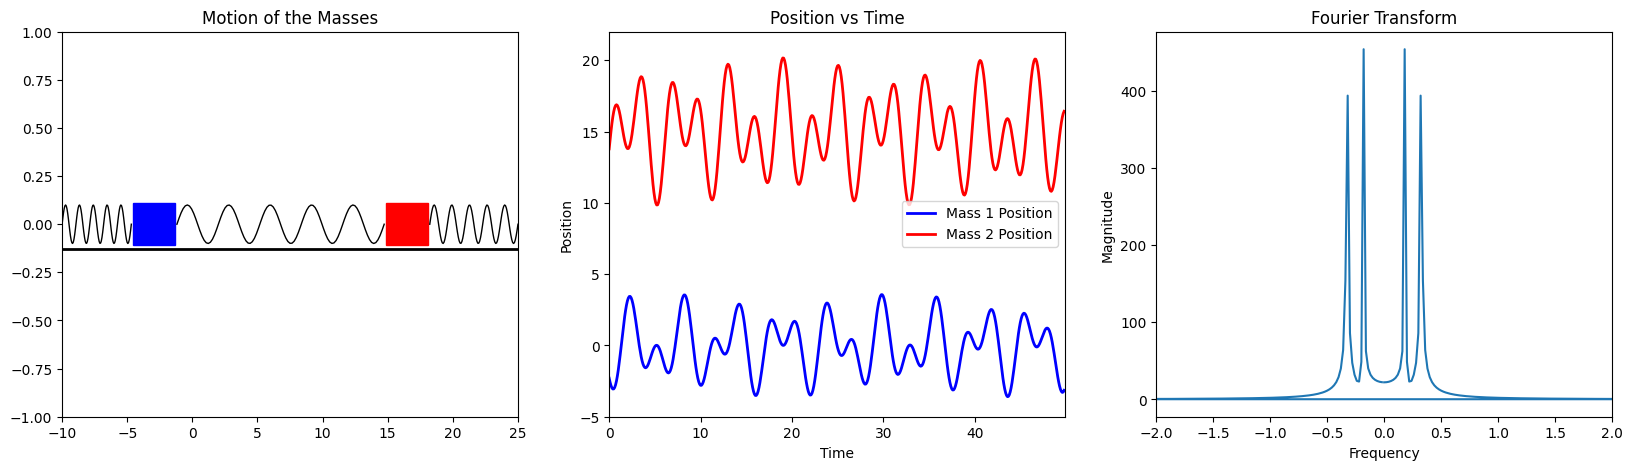

In [ ]:
# 2 Degrees of Freedom System

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
import math
from IPython.display import HTML

# variables
m1 = 2.0 # First Mass
m2 = 1.0 # Second Mass
k1 = 3.0 # First Spring Coefficient
k2 = 2.0 # Second Spring Coefficient
k3 = 1.0 # Third Spring Coefficient

# time parameters
start_time = 0.0
end_time = 50.0
delta_t = 0.1
time = np.arange(start_time, end_time, delta_t)
frame_amount = len(time)

# initial conditions
ix1 = -7.5 # displacement of first mass
ix2 = 7.5 # displacement of second mass
ix1_dot = 0.5 # velocity of first mass
ix2_dot = -0.5 # velocity of second mass

# natural frequency calculation
w1 = np.sqrt(((m2*(k1+k2)+m1*(k2+k3))/(2*m1*m2))+0.5*np.sqrt((((m2*(k1+k2)+m1*(k2+k3))/(m1*m2))**2)-4*(((k1+k2)*(k2+k3)-k2**2)/(m1*m2))))   # Frequency of first mode
w2 = np.sqrt(((m2*(k1+k2)+m1*(k2+k3))/(2*m1*m2))-0.5*np.sqrt((((m2*(k1+k2)+m1*(k2+k3))/(m1*m2))**2)-4*(((k1+k2)*(k2+k3)-k2**2)/(m1*m2))))   # Frequency of second mode

# Amplitude ratio calculation
r1 = (k1+k2-m1*w1*w1)/k2
r2 = (k1+k2-m1*w2*w2)/k2

# Amplitude calculation
X1_1 = np.sqrt(((r1*ix1-ix2)**2)+((ix2_dot-r2*ix1_dot)/w1)**2)/(r2-r1)
X2_1 = r1*X1_1
X1_2 = np.sqrt(((-1*r1*ix1+ix2)**2)+(-1*(ix2_dot-r2*ix1_dot)/w1)**2)/(r2-r1)
X2_2 = r2*X1_2

# Phase angle calculation
phi_1 = math.degrees(math.atan((ix2_dot-r2*ix1_dot)/(w1*(r2*ix1-ix2))))
phi_2 = math.degrees(math.atan((-1*ix2_dot+r1*ix1_dot)/(w2*(-1*r1*ix1+ix2))))

#printing the natural frequencies
print(w1/(2.0*np.pi),w2/(2.0*np.pi))

# Calculation of displacements
X1 = []
X2 = []
for t in time:
  X1.append(X1_1*np.cos(w1*t+phi_1)+X1_2*np.cos(w2*t+phi_2))
  X2.append(15+X2_1*np.cos(w1*t+phi_1)+X2_2*np.cos(w2*t+phi_2))

# CREATING THE ANIMATION
# Generating a screen
fig = plt.figure(figsize=(20, 5), facecolor='w')

# Dividing the screen into 1x3
gs = gridspec.GridSpec(1, 3)

# Function to draw a spring
def draw_spring(ax, x_start, x_end, y, coils=5, amplitude=0.1):
    # x_start: starting x-position of the spring
    # x_end: ending x-position of the spring
    # y: vertical y-position of the spring
    # coils: number of coils in the spring
    # amplitude: amplitude of the spring coil
    t = np.linspace(0, 2 * np.pi * coils, 100)
    spring_x = np.linspace(x_start, x_end, 100)
    spring_y = amplitude * np.sin(t) + y
    return ax.plot(spring_x, spring_y, 'k', lw=1)[0]

# Creating first subplot
ax0 = fig.add_subplot(gs[0, 0])
box1 = ax0.plot([], [], 'bs', ms=30)  # Blue box
box2 = ax0.plot([], [], 'rs', ms=30)  # Red box
ground, = ax0.plot([-10, 25], [-0.13, -0.13], 'k', lw=2)  # Ground line
ax0.set_xlim(-10, 25)
ax0.set_ylim(-1.0, 1.0)
plt.title("Motion of the Masses")

# Initializing the springs
spring1 = draw_spring(ax0, -10, X1[0], 0)  # Left wall to blue box
spring2 = draw_spring(ax0, X1[0], X2[0], 0)  # Between blue and red boxes
spring3 = draw_spring(ax0, X2[0], 25, 0)  # Red box to right wall

# Creating second subplot
ax1 = fig.add_subplot(gs[0, 1])
curve1, = ax1.plot([], [], 'b', lw=2, label="Mass 1 Position")  # Mass 1 curve
curve2, = ax1.plot([], [], 'r', lw=2, label="Mass 2 Position")  # Mass 2 curve
ax1.set_xlim(time[0], time[-1])
ax1.set_ylim(-5, 22)
plt.title("Position vs Time")
ax1.set_xlabel("Time")
ax1.set_ylabel("Position")
ax1.legend()

# Creating third subplot
ax2 = fig.add_subplot(gs[0, 2])
fft_signal = np.fft.fft(X1)
frequencies = np.fft.fftfreq(len(X1), d=time[1] - time[0])
plt.plot(frequencies, np.abs(fft_signal))
plt.xlim(-2.0,2.0)
plt.xticks(np.arange(-2.0,2.20,0.5))
plt.title("Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

# Updating Function
def update_plot(frame):
    # Update box positions
    box1[0].set_data(X1[frame], 0)
    box2[0].set_data(X2[frame], 0)

    # Update spring positions
    spring1.set_data(np.linspace(-10, X1[frame]-1.75, 100), 0.1 * np.sin(np.linspace(0, 2 * np.pi * 5, 100)))
    spring2.set_data(np.linspace(X1[frame]+1.75, X2[frame]-1.75, 100), 0.1 * np.sin(np.linspace(0, 2 * np.pi * 5, 100)))
    spring3.set_data(np.linspace(X2[frame]+1.75, 25, 100), 0.1 * np.sin(np.linspace(0, 2 * np.pi * 5, 100)))

    # Update displacement curves
    curve1.set_data(time[:frame], X1[:frame])
    curve2.set_data(time[:frame], X2[:frame])
    return box1[0], box2[0], curve1, curve2, spring1, spring2, spring3

# Animating Function
anim = animation.FuncAnimation(fig, update_plot, frames=frame_amount, interval=20, blit=True)

# Convert to HTML video
HTML(anim.to_html5_video())

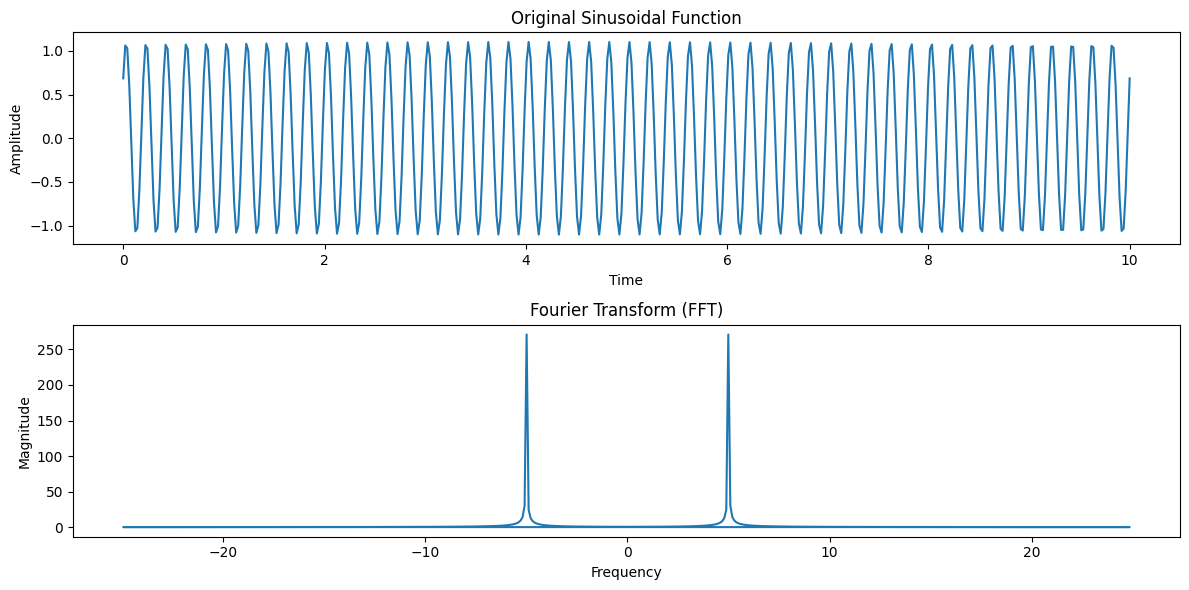

In [ ]:
# prompt: find fourier transform of a random sinusoidal function. Plot both the original function and its fft

import numpy as np
import matplotlib.pyplot as plt

# Generate a random sinusoidal function
time = np.linspace(0, 10, 500)
amplitude = np.random.rand() * 5  # Random amplitude
frequency = 5  # Random frequency
phase = np.random.rand() * 2 * np.pi  # Random phase
signal = amplitude * np.sin(2 * np.pi * frequency * time + phase)

# Compute the Fourier Transform
fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=time[1] - time[0])

# Plot the original function and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Sinusoidal Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_signal))
plt.title('Fourier Transform (FFT)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()